Compute the fraction of interchromosomal contacts along a given chromosome. 
Matrices must be in a rebinned sparse graal format in a Rebin/ directory and in dense format binned at 1 kb (generated using HiC_Sparse_to_dense_fromHicstuff_DpnIIHinfI.ipynb) in a Dense/ directory, located in the main input directory (input_dir). 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
#specify input and output directories 
input_dir = "/mnt/e/Science/HiC/Contact_files/"
out_dir = "/mnt/d/Science/OwnCloud/Experiments/HiC/Quantif/InterChr/" 
#list samples to process. do not include the suffix "_1kb" normally present after binning the files with the master script "Script_master_hicstuff_pipeline.sh" and the sparse_to_dense notebook.
samples=["AD265_S288c_DSB_cutsite_q20"] 

Specify:
- the chromosome of interest
- the binning to use to compute the inter-chromosomal contact profile (minimum 1kb).

In [18]:
bins = 1 #binning in kb
chrom = "chr5" #chromosome name. must match the nomenclature in the reference genome fasta file

for input_file in samples:

    frags = pd.read_csv(str(input_dir + "Rebin/" + str(input_file) + "_1kb.frag.tsv"), sep = "\t") #If using hicstuff versions >3.2.3, replace frag.tsv by frags.tsv
    mA = np.loadtxt(str(input_dir + "Dense/" + str(input_file) + "_dense_1kb.mat.csv"), dtype=np.float64)
    
    min_chr = min(frags[(frags["chrom"]== chrom)].index.values)
    max_chr = max(frags[(frags["chrom"]== chrom)].index.values)
    positions = np.arange(min_chr, max_chr, bins)
    
    contacts_inter = []
    frags_np = np.array(frags)
    frags_coord = []

    
    for VP in positions:
        nA = mA[VP:VP+bins,]
        A = mA[VP:VP+bins,min_chr:max_chr]
        contacts_inter.append(1-sum(sum(A))/sum(sum(nA)))
        frags_coord.append(frags_np[VP,2])

    
    contacts_over_median=contacts_inter
    contacts_over_median=contacts_over_median/np.nanmedian(contacts_inter)
       
    head = np.array(("coordinates", "inter", "inter_over_median"))
    contacts = np.column_stack((frags_coord,contacts_inter,contacts_over_median))
    contacts = np.row_stack((head,contacts))
    
    np.savetxt(str(out_dir + "Inter_chr_" + str(chrom) + "_bin_" + str(bins) + "kb_" + input_file + "_wMedian.tsv"), contacts, fmt="%s", delimiter ="\t")

/tmp/ipykernel_28437/131477067.py:22: RuntimeWarning: invalid value encountered in scalar divide
  contacts_inter.append(1-sum(sum(A))/sum(sum(nA)))


Visualize

Text(0, 0.5, 'Inter freq')

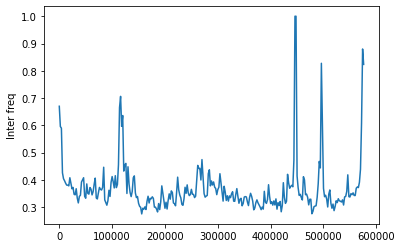

In [6]:
input_file = 'AD265_S288c_DSB_cutsite_q20'
contacts_inter = pd.read_csv(str(out_dir + "Inter_chr_" + str(chrom) + "_bin_" + str(bins) + "kb_" + input_file + ".tsv"), delimiter="\t", header = None)

plt.plot(frags_coord, contacts_inter[1])
#plt.xlim((0,max(contacts_inter["chr5 coordinates"])))
plt.ylabel('Inter freq')